In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numba as nb

Вывод схемы

$$
\frac{\partial \psi}{\partial t} = i b \frac{\partial^2 \psi}{\partial x^2} - i V(x,t)\psi
$$
$$
\frac{\partial \psi}{\partial t} - i b \frac{\partial^2 \psi}{\partial x^2} + i V(x,t)\psi = 0
$$

В вариационном виде:
$$ 
\begin{equation}
\int_{\Omega} \left(\frac{\partial u}{\partial t} - i b \frac{\partial^2 u}{\partial x^2} + i V(x,t)u \right)vd\Omega = 0
\end{equation}
$$

$$\nabla \cdot ( v\nabla  u) = v \Delta u + \nabla  v \nabla u$$
$$\int_{\Omega}\nabla \cdot ( v\nabla  u) d\Omega = \int_{\Omega}  v \Delta u d\Omega + \int_{\Omega}\nabla  v \nabla u d\Omega$$

Теорема Остроградского – Гаусса:
$$\int_{\Omega}\nabla \cdot ( v\nabla  u) d\Omega = \int_{\partial \Omega}  v\nabla (u\cdot \mathbf{n}) d(\partial \Omega)$$
$$ \int_{\Omega}  v \Delta u d\Omega + \int_{\Omega}\nabla  v \nabla u d\Omega= \int_{\partial \Omega}   v\nabla (u\cdot \mathbf{n}) d(\partial \Omega)$$
$$ \int_{\Omega} \alpha(x,y)^2 v \Delta u d\Omega + \int_{\Omega}\nabla  v \nabla u d\Omega= \int_{\partial \Omega}   v\frac{\partial u}{\partial \mathbf{n}} d(\partial \Omega)$$
$$ \int_{\Omega}  v \Delta u d\Omega = - \int_{\Omega}\nabla  v \nabla u d\Omega + \int_{\partial \Omega}   v\frac{\partial u}{\partial \mathbf{n}} d(\partial \Omega)$$


$$ 
\begin{equation}
\int_{\Omega} \left(\frac{\partial u}{\partial t} \right)vd\Omega - i b \int_{\Omega} \left(\frac{\partial^2 u}{\partial x^2} \right)vd\Omega+ i \int_{\Omega} \left(V(x,t)u \right)vd\Omega = 0
\end{equation}
$$


$$ 
\begin{equation}
\int_{\Omega} \left(\frac{\partial u}{\partial t} \right)vd\Omega 

+ i b \int_{\Omega} \left(\frac{\partial u}{\partial x} \frac{\partial v}{\partial x} \right)d\Omega - i b \int_{\partial \Omega}   v\frac{\partial u}{\partial \mathbf{n}} d(\partial \Omega)

+ i \int_{\Omega} \left(V(x,t)u \right)vd\Omega = 0
\end{equation}
$$


$$ 
\begin{equation}
\int_{-L}^{L} \left(\frac{\partial u}{\partial t} \right)vdx 

+ i b \int_{-L}^{L} \left(\frac{\partial u}{\partial x} \frac{\partial v}{\partial x} \right)dx 

- i b \int_{\partial \Omega}   v\frac{\partial u}{\partial \mathbf{n}} d(\partial \Omega)

+ i \int_{-L}^{L}  \left(V(x,t)u \right)vdx = 0
\end{equation}
$$



$$
i b \int_{\partial \Omega}   v\frac{\partial u}{\partial \mathbf{n}} d(\partial\Omega) = i b \left( v(L)\frac{\partial u}{\partial \mathbf{n}}(L) + v(-L)\frac{\partial u}{\partial \mathbf{n}}(-L) \right) = i b \left( v(L)\frac{\partial u}{\partial x}(L) - v(-L)\frac{\partial u}{\partial x}(-L) \right) 
$$


$$ 
\begin{equation}
\int_{-L}^{L} \left(\frac{\partial u}{\partial t} \right)vdx 

+ i b \int_{-L}^{L} \left(\frac{\partial u}{\partial x} \frac{\partial v}{\partial x} \right)dx 

- i b \left( v(L, t)\frac{\partial u}{\partial x}(L, t) - v(-L, t)\frac{\partial u}{\partial x}(-L, t) \right) 

+ i \int_{-L}^{L}  \left(V(x,t)u \right)vdx = 0
\end{equation}
$$

Граничное условие поглащения ABC:

Вне области счтаем потенциала нет и найдем те моды что ууходят из области:

$$
\frac{\partial \psi}{\partial t} = i b \frac{\partial^2 \psi}{\partial x^2} 
$$

перейдем в частотную область

$$
\frac{\partial \psi}{\partial t}(x, t) = i b \frac{\partial^2 \psi}{\partial x^2} (x, t)
$$

$$
\mathcal{F}\left[\frac{\partial \psi}{\partial t}(x, t) \right]= i b \mathcal{F}\left[\frac{\partial^2 \psi}{\partial x^2} (x, t) \right] 
$$

$$
i \omega \widetilde{\psi}(x, \omega) = i b  \frac{\partial^2 \widetilde{\psi}}{\partial x^2} (x, \omega) 
$$




$$
b  \frac{\partial^2 \widetilde{\psi}}{\partial x^2} (x, \omega) -  \omega \widetilde{\psi}(x, \omega) = 0
$$

Решение этого уравнения это суперпозиция волн при $\omega > 0$:

$$
\widetilde{\psi}(x, \omega)  = A(\omega) e^{ \sqrt{\frac{\omega}{b}}x} + B(\omega)e^{-\sqrt{\frac{\omega}{b}}x}
$$

Требуя ограниченность получаем, что на границе должно остаться только убывающая часть:


$$
\widetilde{\psi}(x, \omega)  =  B(\omega)e^{-\sqrt{\frac{\omega}{b}}x}
$$


Отсюда на границе получаем условие:


$$
\frac{\partial \widetilde{\psi}}{\partial x}(x, \omega) = -\sqrt{\frac{\omega}{b}}\ B(\omega)e^{-\sqrt{\frac{\omega}{b}}x} = -\sqrt{\frac{\omega}{b}}\widetilde{\psi}(x, \omega) 
$$

$$
\frac{\partial \widetilde{\psi}}{\partial x}(L, \omega) = -\sqrt{\frac{\omega}{b}}\widetilde{\psi}(L, \omega) 
$$

$$
\sqrt{i} = e^{\frac{i\pi}{4}} 
$$

$$
\frac{\partial \widetilde{\psi}}{\partial x}(L, \omega) = -e^{\frac{-i\pi}{4}} \sqrt{\frac{i \omega}{b}} \ \widetilde{\psi}(L, \omega) 
$$

$$
\frac{\partial \widetilde{\psi}}{\partial x}(-L, \omega) =e^{\frac{-i\pi}{4}} \sqrt{\frac{i \omega}{b}} \ \widetilde{\psi}(-L, \omega) 
$$


Откуда получаем в пярмом пространстве дробную производную после взятия обратного преобразования фурье оставляя сдвиг в вном виде:

$$
\frac{\partial \psi}{\partial x}(L, t) = \mathcal{F}^{-1}\left[-e^{\frac{-i\pi}{4}} \sqrt{\frac{i \omega}{b}} \ \widetilde{\psi}(L, \omega)  \right] = 

-e^{\frac{-i\pi}{4}} \frac{1}{\sqrt{b}} \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}\psi(L, t)

$$

$$
\frac{\partial \psi}{\partial x}(-L, t) = \mathcal{F}^{-1}\left[e^{\frac{-i\pi}{4}} \sqrt{\frac{i \omega}{b}} \ \widetilde{\psi}(-L, \omega)  \right] = 

e^{\frac{-i\pi}{4}} \frac{1}{\sqrt{b}} \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}\psi(-L, t)

$$


$$ 
\begin{equation}
\int_{-L}^{L} \left(\frac{\partial u}{\partial t} \right)vdx 

+ i b \int_{-L}^{L} \left(\frac{\partial u}{\partial x} \frac{\partial v}{\partial x} \right)dx 

- i b \left( v(L, t)\frac{\partial u}{\partial x}(L, t) - v(-L, t)\frac{\partial u}{\partial x}(-L, t) \right) 

+ i \int_{-L}^{L}  \left(V(x,t)u \right)vdx = 0
\end{equation}
$$

Откуда окончательно получаем слабую форму поглащающими граничными условями:


$$ 
\begin{equation}
\int_{-L}^{L} \left(\frac{\partial u}{\partial t} \right)vdx 

+ i b \int_{-L}^{L} \left(\frac{\partial u}{\partial x} \frac{\partial v}{\partial x} \right)dx 

+ i b \left( v(L, t)e^{\frac{-i\pi}{4}} \frac{1}{\sqrt{b}} \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}\psi(L, t) + v(-L, t)e^{\frac{-i\pi}{4}} \frac{1}{\sqrt{b}} \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}\psi(-L, t) \right) 

+ i \int_{-L}^{L}  \left(V(x,t)u \right)vdx = 0
\end{equation}
$$


$$ 
\begin{equation}
\int_{-L}^{L} \left(\frac{\partial u}{\partial t} \right)vdx 

+ i b \int_{-L}^{L} \left(\frac{\partial u}{\partial x} \frac{\partial v}{\partial x} \right)dx 

+ i \sqrt{b} e^{\frac{-i\pi}{4}} \left( v(L, t)  \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}\psi(L, t) + v(-L, t) \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}\psi(-L, t) \right) 

+ i \int_{-L}^{L}  \left(V(x,t)u \right)vdx = 0
\end{equation}
$$

По мкэ:

$$
\begin{equation}
u^h = \sum_{i}^N Q_i(t)\phi_i(x)
\end{equation}
$$
Q - соответствует значению в i-том узле во время t
$$
\begin{equation}
Q_i(t) = Q(x_i, t)
\end{equation}
$$

$$ 

\int_{-L}^{L} \left(\sum_{i}^N \frac{\partial }{\partial t}Q_i(t)\phi_i(x) \sum_{j}^N Q_j(t)\phi_j(x)\right)dx \ +

$$
$$

i b \int_{-L}^{L} \left(\sum_{i}^N Q_i(t)\frac{\partial }{\partial x}\phi_i(x) \sum_{j}^N Q_j(t)\frac{\partial }{\partial x}\phi_j(x) \right)dx \ +
$$

$$
 i \int_{-L}^{L}  \left(V(x,t) \sum_{i}^N Q_i(t)\phi_i(x) \sum_{j}^N Q_j(t)\phi_j(x) \right) dx \ +
$$
$$
 i \sqrt{b} e^{\frac{-i\pi}{4}} \left(  \sum_{j}^N Q_j(t)\phi_j(L)  \sum_{i}^N \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}Q_i(t)\phi_i(L)
 
 + \sum_{j}^N Q_j(t)\phi_j(-L) \sum_{i}^N \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}Q_i(t)\phi_i(-L) \right) = 0
$$

теперь пользуясь тем что это квадратичная форма:
$$
j = 0..N
$$

$$ 
\int_{-L}^{L} \left(\sum_{i}^N \frac{\partial }{\partial t}Q_i(t)\phi_i(x)  Q_j(t)\phi_j(x)\right)dx \ +
$$
$$
i b \int_{-L}^{L} \left(\sum_{i}^N Q_i(t)\frac{\partial }{\partial x}\phi_i(x) Q_j(t)\frac{\partial }{\partial x}\phi_j(x) \right)dx \ +
$$
$$
 i \int_{-L}^{L}  \left(V(x,t) \sum_{i}^N Q_i(t)\phi_i(x) Q_j(t)\phi_j(x) \right) dx \ +
$$
$$
 i \sqrt{b} e^{\frac{-i\pi}{4}} \left(   Q_j(t)\phi_j(L)  \sum_{i}^N \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}Q_i(t)\phi_i(L)
 
 +  Q_j(t)\phi_j(-L) \sum_{i}^N \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}Q_i(t)\phi_i(-L) \right) = 0
$$

$$Au=0$$

$$(Au_n, v_n)=0$$

$$(Au_n, \sum_{j}^N Q_j(t)\phi_j(x))=0$$

$$\sum_{j}^NQ_j(t)(Au_n,  \phi_j(x))=0$$
так как $Q_j(t)$ не равно нулю решения ищем не тривиальные:
$$(Au_n, \phi_j(x, y))=0$$
$$j=0,1,..,N$$

Откуда:

$$ 
\int_{-L}^{L} \left(\sum_{i}^N \frac{\partial }{\partial t}Q_i(t)\phi_i(x) \phi_j(x)\right)dx \ +
$$
$$
i b \int_{-L}^{L} \left(\sum_{i}^N Q_i(t)\frac{\partial }{\partial x}\phi_i(x) \frac{\partial }{\partial x}\phi_j(x) \right)dx \ +
$$
$$
 i \int_{-L}^{L}  \left(V(x,t) \sum_{i}^N Q_i(t)\phi_i(x) \phi_j(x) \right) dx \ +
$$
$$
 i \sqrt{b} e^{\frac{-i\pi}{4}} \left(  \phi_j(L)  \sum_{i}^N \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}Q_i(t)\phi_i(L)
 
 +  \phi_j(-L) \sum_{i}^N \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}Q_i(t)\phi_i(-L) \right) = 0
$$

Получаем СЛАУ со следующими матрицами:
$$
K_{i,j} = \int_{-L}^{L}  \phi_i(x) \phi_j(x) dx
$$
$$
M_{i,j} = \int_{-L}^{L}  \frac{\partial }{\partial x}\phi_i(x) \frac{\partial }{\partial x}\phi_j(x) dx
$$
$$
V_{i,j}(t) = \int_{-L}^{L}  V(x,t)\phi_i(x) \phi_j(x) dx
$$
$$
B_{i,j}^{+} = \phi_i(L) \phi_j(L)
$$
$$
B_{i,j}^{-} = \phi_i(-L) \phi_j(-L)
$$
$$
B = B_{i,j}^{+} + B_{i,j}^{-}
$$
$$
K \dot{{Q}}(t) + iM{Q}(t) + i V(t){Q}(t) + i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}{Q}(t) = 0
$$

если V - стационарный потенциал решаем в частотной области:
это эквивалентно наблюдению в окне от начала до конца моделирования
$$
W(t, \tau) = sign(t) - sign(t - \tau)
$$

$$
\mathcal{F}\left[ \left( K \dot{{Q}}(t) + iM{Q}(t) + i V{Q}(t) + i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}{Q}(t)\right)W(t, \tau)\right]  = 0
$$
По теореме о свертке
<!-- $$
i \omega K \widetilde{Q}(\omega) + iM \widetilde{Q}(\omega) + i V \widetilde{Q}(\omega) + i\sqrt{b \omega}  B \widetilde{Q}(\omega)   = 0
$$ -->
$$
\left(\omega K  + M  +  V  + \sqrt{b \omega}  B \right)\widetilde{Q}(\omega)*\widetilde{W}(\omega, \tau)  = 0
$$
Откуда решение обратное преобразование фурье от полученного вектора для каждой компоненты 




$$
K \dot{{Q}}(t) + iM{Q}(t) + i V(t){Q}(t) + i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}{Q}(t) = 0
$$

Схема Кранка - Николсона:



$$
K \dot{{Q}}(t) + i(M + V(t)){Q}(t) + i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{d^{\frac{1}{2}}}{dt^{\frac{1}{2}}}{Q}(t) = 0
$$

производная Герасимова–Капуто:

$$
D^{\alpha}_{t}u(t) = \frac{1}{\Gamma(1-\alpha)} \int_0^t \frac{du}{d\tau} \frac{1}{(t-\tau)^{\alpha}}d\tau
$$

$$
K \dot{{Q}}(t) + i(M + V(t)){Q}(t) + i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\Gamma(1/2)} \int_0^t \frac{d{Q}(\tau)}{d\tau} \frac{1}{(t-\tau)^{\frac{1}{2}}}d\tau = 0
$$

$$
K \dot{{Q}}(t) + i(M + V(t)){Q}(t) + i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} \int_0^t \frac{d{Q}(\tau)}{d\tau} \frac{1}{(t-\tau)^{\frac{1}{2}}}d\tau = 0
$$

$$
\dot{u} + D^{\frac{1}{2}}_t u = 0
$$

forward Euler

$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} \int_0^{t_n} \frac{d{Q}(\tau)}{d\tau} \frac{1}{(t_n-\tau)^{\frac{1}{2}}}d\tau = 0

$$


$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} \int_0^{t_n} \frac{d{Q}(\tau)}{d\tau} \frac{1}{(t_n-\tau)^{\frac{1}{2}}}d\tau = 0

$$

разобью интеграл на сумму отрезков 
$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\sum_{j=1}^n \int_{t_{j-1}}^{t_j} \frac{d{Q}(\tau)}{d\tau} \frac{1}{(t_j-\tau)^{\frac{1}{2}}}d\tau = 0

$$

Тогда производная по $\tau$ - даст преобразование:

$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\sum_{j=1}^n \int_{t_{j-1}}^{t_j} \frac{Q_{j}-Q_{j-1}}{\Delta t} \frac{1}{(t_j-\tau)^{\frac{1}{2}}}d\tau = 0

$$


$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t}  \int_{t_{j-1}}^{t_j} \frac{1}{(t_j-\tau)^{\frac{1}{2}}}d\tau = 0

$$

$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} 2(\sqrt{t_n- t_{j-1}} - \sqrt{t_n - t_j})= 0

$$



$$
K\frac{1}{\Delta t} (Q(t_{n+1}) - Q(t_{n})) + i(M+V(t_n))Q(t_n) 

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} 2(\sqrt{\Delta t}\sqrt{ n - (j-1)} - \sqrt{\Delta t}\sqrt{n - j})= 0

$$

$$
K\frac{1}{\Delta t} (Q_{n+1} - Q_n) + i(M+V_n)Q_n

+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 2\sqrt{\Delta t}

\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})= 0

$$

backward Euler
$$
K\frac{1}{\Delta t} (Q_{n+1} - Q_n) + i(M+V_{n+1})Q_{n+1}
+ i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 2\sqrt{\Delta t}
\sum_{j=1}^{n+1} \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1}) = 0
$$

Усреднение и схема Кранка - Николсона:

$$
K\frac{1}{\Delta t} (Q_{n+1} - Q_n) + 

\frac{1}{2} i(M+V_n)Q_n +

\frac{1}{2} i(M+V_{n+1})Q_{n+1} +

\frac{1}{2} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 2\sqrt{\Delta t}\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\frac{1}{2} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 2\sqrt{\Delta t}\sum_{j=1}^{n+1} \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1}) = 0
$$

$$
K\frac{1}{\Delta t}Q_{n+1} - K\frac{1}{\Delta t}Q_n + 

\frac{1}{2} iM Q_n + \frac{1}{2} i V_n Q_n +

\frac{1}{2} i M Q_{n+1} + \frac{1}{2} i V_{n+1}Q_{n+1} +

\frac{1}{2} 2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\left(\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\sum_{j=1}^{n+1} \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right)= 0
$$

$$
(K\frac{1}{\Delta t} + \frac{1}{2} i M  + \frac{1}{2} i V_{n+1})Q_{n+1}

- (K\frac{1}{\Delta t} - \frac{1}{2} iM  - \frac{1}{2} i V_n) Q_n  +

\frac{1}{2} 2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\left(\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\sum_{j=1}^{n+1} \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right)= 0
$$

$$
(K\frac{2}{\Delta t} +  i M  +  i V_{n+1})Q_{n+1}

- (2K\frac{1}{\Delta t} -   iM  -   i V_n) Q_n  +

 2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\left(\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\sum_{j=1}^{n+1} \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) = 0
$$

$$
\left(\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\sum_{j=1}^{n+1} \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) = 
$$

$$
\left(\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\sum_{j=1}^{n} (\frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1})) + \frac{Q_{n+1}-Q_{n}}{\Delta t} (\sqrt{ n - (n+1) + 2} - \sqrt{n - (n+1) + 1})\right) = 
$$

$$
\left(\sum_{j=1}^n \frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n - (j-1)} - \sqrt{n - j})+

\sum_{j=1}^{n} (\frac{Q_{j}-Q_{j-1}}{\Delta t} (\sqrt{ n -j+2} - \sqrt{n - j + 1})) + \frac{Q_{n+1}-Q_{n}}{\Delta t} (1 - 0)\right) = 
$$

$$
\sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} 

\left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) +


(\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right)

+ \frac{Q_{n+1}-Q_{n}}{\Delta t}  = 
$$

$$
(K\frac{2}{\Delta t} +  i M  +  i V_{n+1})Q_{n+1}

- (2K\frac{1}{\Delta t} -   iM  -   i V_n) Q_n  +

2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} 

\sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} 

\left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) +


(\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right)

+  2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}} B \frac{1}{\sqrt{\pi}} \frac{Q_{n+1}-Q_{n}}{\Delta t} = 0

$$

$$
(K\frac{2}{\Delta t} +  i M  +  i V_{n+1})Q_{n+1}

- (2K\frac{1}{\Delta t} -   iM  -   i V_n) Q_n  +

\frac{2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\pi}}  B 

\sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} 

\left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) +


(\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right)

+  \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B  (Q_{n+1}-Q_{n})  = 0

$$

$$
(K\frac{2}{\Delta t} +  i M  +  i V_{n+1} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B)Q_{n+1}

- (2K\frac{1}{\Delta t} - iM  - i V_n) Q_n  - \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B Q_{n} +

\frac{2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\pi}}  B 

\sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} 

\left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) +

(\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right) = 0

$$

$$
(K\frac{2}{\Delta t} +  i M  +  i V_{n+1} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B)Q_{n+1}

- (2K\frac{1}{\Delta t} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B - iM  - i V_n) Q_n  +

\frac{2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\pi}}  B 

 \sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} 

\left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) +

(\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right) = 0

$$

$$
(K\frac{2}{\Delta t} +  i M  +  i V_{n+1} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B)Q_{n+1} 
= (2K\frac{1}{\Delta t} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B - iM  - i V_n) Q_n -
 \frac{2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\pi}}  B \sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} \left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) + (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right) 
$$

$$
K_{i,j} = \int_{-L}^{L}  \phi_i(x) \phi_j(x) dx
$$
$$
M_{i,j} = \int_{-L}^{L}  \frac{\partial }{\partial x}\phi_i(x) \frac{\partial }{\partial x}\phi_j(x) dx
$$
$$
V_{i,j}(t) = \int_{-L}^{L}  V(x,t)\phi_i(x) \phi_j(x) dx
$$
$$
B_{i,j}^{+} = \phi_i(L) \phi_j(L)
$$
$$
B_{i,j}^{-} = \phi_i(-L) \phi_j(-L)
$$
$$
B = B_{i,j}^{+} + B_{i,j}^{-}
$$

Для нулевого потенциала частный случай:

$$
(K\frac{2}{\Delta t} +  i M  + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B)Q_{n+1} 
= (2K\frac{1}{\Delta t} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B - iM ) Q_n -
 \frac{2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\pi}}  B \sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} \left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) + (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) \right) 
$$

$$
w_{n,j} = \left( (\sqrt{ n - (j-1)} - \sqrt{n - j}) + (\sqrt{ n -j+2} - \sqrt{n - j + 1}) \right) 

$$
$$
(K\frac{2}{\Delta t} +  i M  + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B)Q_{n+1} 
= (2K\frac{1}{\Delta t} + \frac{ 2 i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\Delta t} \sqrt{\pi}} B - iM ) Q_n -
 \frac{2\sqrt{\Delta t} i\sqrt{b} e^{\frac{-i\pi}{4}}}{\sqrt{\pi}}  B \sum_{j=1}^n \left( \frac{Q_{j}-Q_{j-1}}{\Delta t} w_{n,j} \right) 
$$

In [57]:
@nb.njit
def psi(x_i, x, i, N, h):
    """x - array, i - num of x and function psi_i(x_i), пробная(базисная) функция"""
    if i == 0:
        if x_i >= x[i] and x_i <= x[i+1]:
            return (x[i+1] - x_i) / h
        elif x_i >= x[i+1]:
            return 0
    elif i == N:
        if x_i >= x[i-1] and x_i <= x[N]:
            return (x_i - x[N-1]) / h
        else:
            return 0
    else:        
        if x_i <= x[i-1]:
            return 0
        elif x_i >= x[i-1] and x_i <= x[i]:
            return (x_i - x[i-1]) / h
        elif x_i >= x[i] and x_i <= x[i+1]:
            return (x[i+1] - x_i) / h
        else:
            return 0

@nb.njit(parallel=True)
def M(i,j,x,h,N):
    psi_i = np.zeros((N), dtype = np.float64)
    psi_j = np.zeros((N), dtype = np.float64)
    diff_psi_i = np.zeros((N), dtype = np.float64)
    diff_psi_j = np.zeros((N), dtype = np.float64)
    for n in nb.prange(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        psi_j[n] = psi(x[n], x, j, N, h)
    diff_psi_i[1:] = np.diff(psi_i)/h
    diff_psi_j[1:] = np.diff(psi_j)/h
    return np.sum(diff_psi_i*diff_psi_j)*h

@nb.njit(parallel=True)
def K(i,j,x,h,N):
    psi_i = np.zeros((N), dtype = np.float64)
    psi_j = np.zeros((N), dtype = np.float64)
    for n in nb.prange(0,N):
        psi_i[n] = psi(x[n], x, i, N, h)
        psi_j[n] = psi(x[n], x, j, N, h)
    return np.sum(psi_i*psi_j)*h

@nb.njit
def B(i, j, x, h, N):
    x_minus = x[0]   # -L
    x_plus  = x[-1]   # +L

    val_i_plus  = psi(x_plus,  x, i, N, h)
    val_j_plus  = psi(x_plus,  x, j, N, h)
    val_i_minus = psi(x_minus, x, i, N, h)
    val_j_minus = psi(x_minus, x, j, N, h)


    return val_i_plus * val_j_plus + val_i_minus * val_j_minus

@nb.njit(parallel=True)
def Calc_MATRIX(x, h, N):
    M_mtrx = np.zeros((N,N), dtype = np.float64)
    K_mtrx = np.zeros((N,N), dtype = np.float64)
    B_mtrx  = np.zeros((N,N), dtype = np.float64)
    for i in nb.prange(0, N):
        for j in nb.prange(0, N):
            M_mtrx[i,j] = M(i,j,x,h,N)
            K_mtrx[i,j] = K(i,j,x,h,N)
            B_mtrx[i,j] = B(i,j,x,h,N)
    return M_mtrx, K_mtrx, B_mtrx

@nb.njit
def w_n_j(n, j):
    return np.sqrt(n-j+2) - np.sqrt(n-j)

@nb.njit
def sum_right_part(n, Q, N, dt):
    conv = np.zeros(N, dtype=np.complex128)
    for j in range(1, n+1):
        w = w_n_j(n, j)
        conv += (Q[:, j] - Q[:, j-1]) * w
    return conv

In [58]:
@nb.njit(parallel=True)
def Shredinger_calc_ABC(N, T, L, b, Psi_0):
    x = np.linspace(-L, L, N)
    dx = x[1]-x[0]
    dt = (dx**2)
    t = np.linspace(0, dt*T, T)
    h = dx
    
    M_mtrx, K_mtrx, B_mtrx = Calc_MATRIX(x, h, N)
    
    left_part_mtrx = (2/dt) * K_mtrx + 1j*M_mtrx + (2*1j*np.sqrt(b)*np.exp(-1j*np.pi/4)/(np.sqrt(dt*np.pi)))*B_mtrx
    
    right_part_mtrx =  (2/dt) * K_mtrx - 1j*M_mtrx + (2*1j*np.sqrt(b)*np.exp(-1j*np.pi/4)/(np.sqrt(dt*np.pi)))*B_mtrx
    
    right_part_mtrx_caputo = 1j * (2/np.sqrt(dt*np.pi)) * np.sqrt(b) * np.exp(-1j*np.pi/4)
    
    Q_solution = np.zeros((N,T), dtype = np.complex128)
    
    Q_solution[:, 0] = Psi_0[:]     
    
    for i in range(0,T-1):
        
        A = np.dot(right_part_mtrx, Q_solution[:,i])
        
        ABC = np.dot(right_part_mtrx_caputo*B_mtrx , sum_right_part(i, Q_solution, N, T))
        
        Q_solution[:,i+1] = np.linalg.solve(left_part_mtrx, A - ABC) 
    
    Phi = np.zeros((N, N), dtype=np.complex128)
    for i in nb.prange(N):
        for n in nb.prange(N):
            Phi[n, i] = psi(x[n], x, i, N, h)

    Psi = np.zeros((N, T), dtype=np.complex128)
    for m in nb.prange(T):
        Psi[:, m] = np.dot(Phi, Q_solution[:, m])
    
    return Psi, x, t
    

Аналитическое решение:
$$

$$

In [92]:
@nb.njit
def elbrus_analitic(x, t):
    return (1/(((2*np.pi)**(1/4))*((1+1j*t)**(1/2)))) * np.exp(-(x**2/(4*(1+1j*t))))

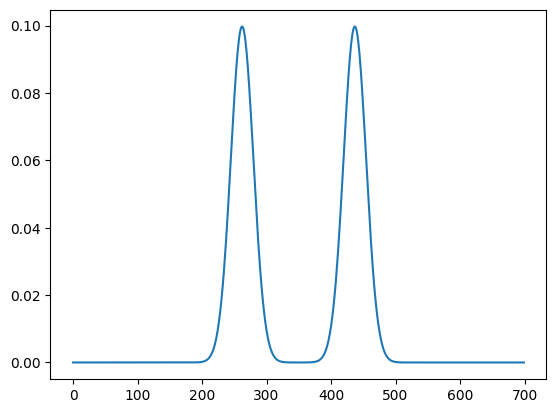

In [82]:
L = 20
N = 700
T = 2500
ksi = 5
x = np.linspace(-L, L, N)
psi_not = elbrus_analitic(x - ksi, 0)/2 + elbrus_analitic(x + ksi, 0)/2 
plt.plot(np.abs(psi_not)**2)

In [83]:
psi_solv, xx, tt =  Shredinger_calc_ABC(N, T, L, 1, psi_not)

In [86]:
rho_1 = np.zeros((N, T), dtype = np.complex128)

ksi = 5

for i in range(0, N):
    for j in range(0, T):
        rho_1[i,j] = elbrus_analitic(xx[i] - ksi, tt[j])/2 + elbrus_analitic(xx[i] + ksi, tt[j])/2 

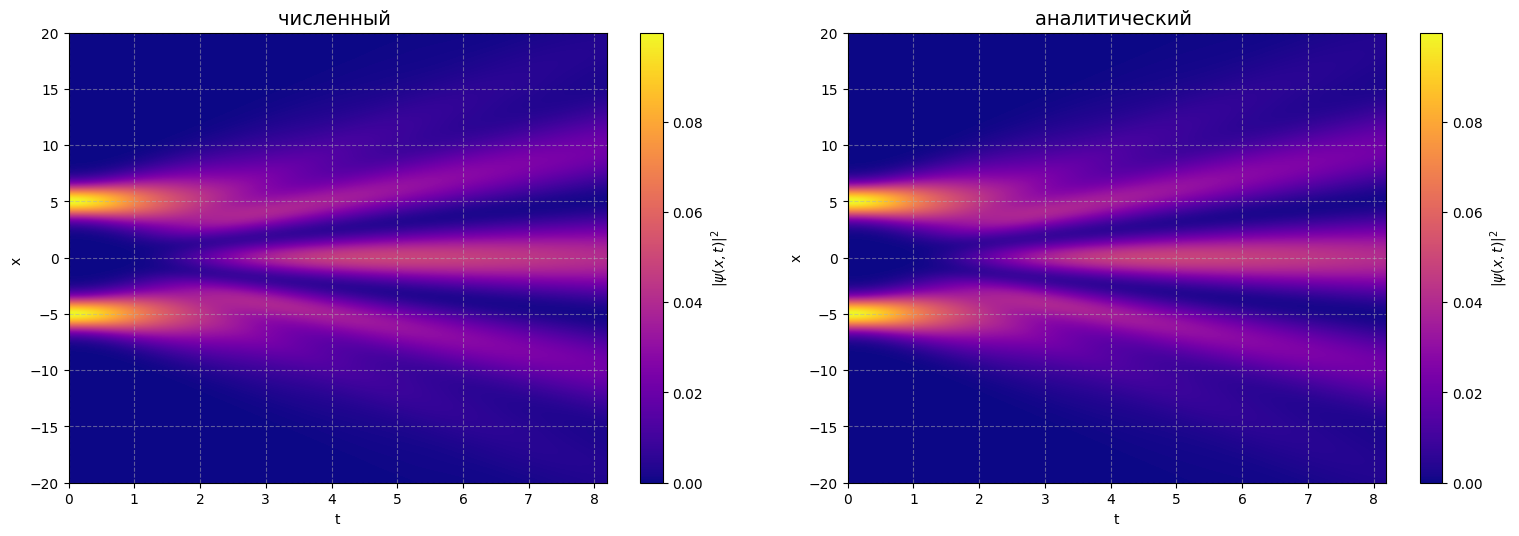

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

im1 = ax1.imshow(
    np.abs(psi_solv)**2, 
    extent=[tt[0], tt[-1], xx[0], xx[-1]],
    origin='lower',
    aspect='auto',
    cmap='plasma'
)
ax1.set_title("численный ", fontsize=14)
# ax1.set_xlim(0, 15)
# ax1.set_ylim(0, 10)
ax1.set_xlabel("t")
ax1.set_ylabel("x ")
ax1.grid(True, linestyle='--', alpha=0.5)
fig.colorbar(im1, ax=ax1, label='$|\\psi(x,t)|^2$')

im2 = ax2.imshow(
    np.abs(rho_1)**2,  
    extent=[tt[0], tt[-1], xx[0], xx[-1]],
    origin='lower',
    aspect='auto',
    cmap='plasma'
)
ax2.set_title("аналитический ", fontsize=14)
# ax2.set_xlim(0, 15)
# ax2.set_ylim(0, 10)
ax2.set_xlabel("t")
ax2.set_ylabel("x")
ax2.grid(True, linestyle='--', alpha=0.5)
fig.colorbar(im2, ax=ax2, label='$|\\psi(x,t)|^2$')

plt.tight_layout(pad=3.0) 
plt.show()

Профиль решения во времени:

<img src="elbrus.gif" width="1000">